In [86]:
import pandas as pd
import requests
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
import hvplot.pandas

In [87]:
#import and read CSV file
complete_data_df = pd.read_csv("Global_Landslide_Catalog_Export.csv")
sample_df = complete_data_df.iloc[0:20]

In [88]:
#select columns that we will be using 
selected_data_df = complete_data_df[['event_id','landslide_category','landslide_setting',\
                                'longitude','latitude','landslide_size','injury_count','fatality_count','landslide_trigger','country_name',\
                                'event_date','storm_name']]
selected_data_df.head()

,event_id,landslide_category,landslide_setting,longitude,latitude,landslide_size,injury_count,fatality_count,landslide_trigger,country_name,event_date,storm_name
0,684,landslide,mine,107.4500,32.5625,large,NaN,11.0,rain,China,08/01/2008 12:00:00 AM,NaN
1,956,mudslide,unknown,-122.6630,45.4200,small,NaN,0.0,downpour,United States,01/02/2009 02:00:00 AM,NaN
2,973,landslide,unknown,-75.3587,-11.1295,large,NaN,10.0,downpour,Peru,01/19/2007 12:00:00 AM,NaN
3,1067,landslide,unknown,81.7080,28.8378,medium,NaN,1.0,monsoon,Nepal,07/31/2009 12:00:00 AM,NaN
4,2603,landslide,unknown,123.8978,10.3336,medium,NaN,0.0,tropical_cyclone,Philippines,10/16/2010 12:00:00 PM,Supertyphoon Juan (Megi)


In [89]:
#convert landslide size into numbers
selected_data_df = pd.DataFrame(selected_data_df)
selected_data_df["landslide_size_num"] = np.nan
for index, row in selected_data_df.iterrows():
    if row["landslide_size"] == "small":
        selected_data_df.loc[index,"landslide_size_num"] = 0
    elif row["landslide_size"] == "medium":
        selected_data_df.loc[index,"landslide_size_num"] = 1
    elif row["landslide_size"] == "large":
        selected_data_df.loc[index,"landslide_size_num"] = 2
    elif row["landslide_size"] == "very_large":
        selected_data_df.loc[index,"landslide_size_num"] = 3
        
  

In [90]:
#Create 'month' column from event_date code
selected_data_df["month"] = pd.to_datetime(complete_data_df["event_date"]).dt.month

# Comparing Countries

In [91]:
#Creating list of most frequently occuring countries in the dataset
df = selected_data_df.groupby("country_name")["event_id"].agg([ lambda x: ((x > 0)*1).sum() > 250])
top_countries = df.loc[df.values].index.tolist()
#Filtering dataset to only show landslides from most frequently occuring countries
top_countries_df = complete_data_df.loc[complete_data_df["country_name"].isin(top_countries)]


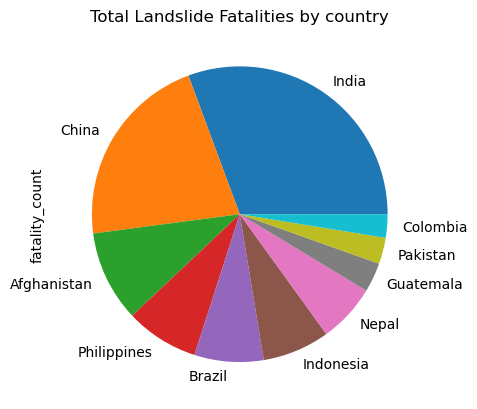

In [105]:
#plotting total fatalities by country
selected_data_df.groupby("country_name")["fatality_count"].sum().sort_values(ascending=False).head(10).plot(kind="pie")
plt.title("Total Landslide Fatalities by country")
plt.xlabel("")
plt.savefig("total_landslides_by_country.png")
plt.show()

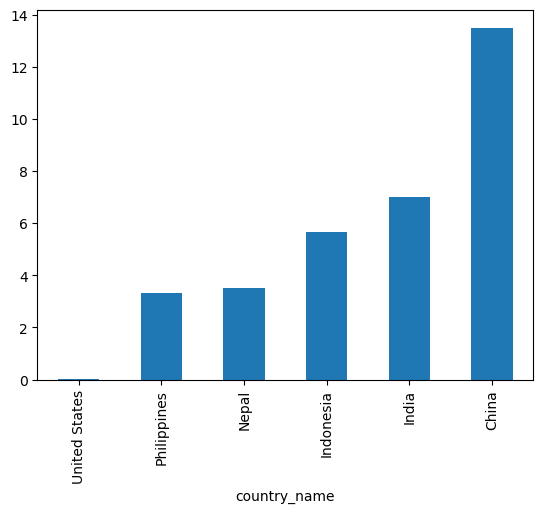

In [106]:
#plotting average fatalities by country
top_countries_df.groupby("country_name")["fatality_count"].mean().sort_values().plot(kind="bar")
plt.savefig("average_landslides_by_country.png")

In [94]:
landslide_plot = selected_data_df.hvplot.points("longitude","latitude",geo=True,tiles="EsriNatGeo",size="fatality_count",color="fatality_count")
landslide_plot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longitude,latitude]   (fatality_count)

In [95]:
top_countries_df.groupby("country_name")["fatality_count"].max()

country_name
China            1765.0
India            5000.0
Indonesia         240.0
Nepal             250.0
Philippines       430.0
United States      43.0
Name: fatality_count, dtype: float64

# Landslide triggers

<AxesSubplot:xlabel='landslide_trigger'>

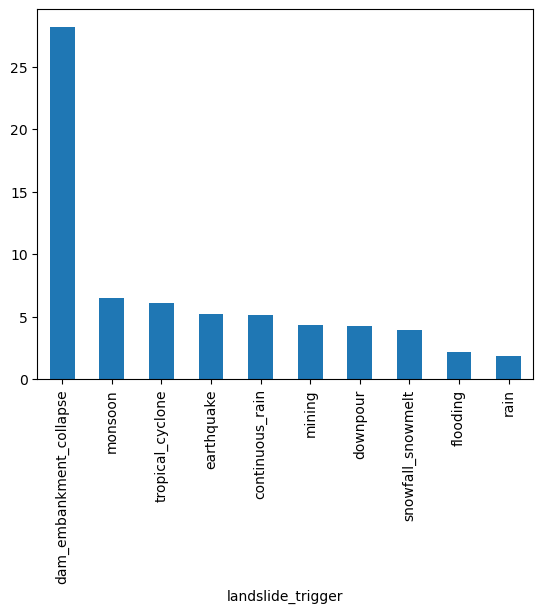

In [103]:



selected_data_df.groupby("landslide_trigger")["fatality_count"].mean().sort_values(ascending=False).head(10).plot(kind="bar")


In [79]:
trigger_df = selected_data_df.groupby("landslide_trigger")["event_id"].agg([ lambda x: ((x > 0)*1).sum() > 250])
top_triggers = df.loc[df.values].index.tolist()
top_countries_df = complete_data_df.loc[complete_data_df["country_name"].isin(top_countries)]

In [ ]:
plt.plot(selected_data_df[""])

In [ ]:
selected_data_df['landslide_trigger'] = selected_data_df['landslide_trigger'].replace({'downpour': 'heavy_rains',
    'rain': 'heavy_rains', 'continuous_rain': 'heavy_rains','flooding': 'heavy_rains',
    'monsoon': 'monsoon_cyclone','tropical_cyclone': 'monsoon_cyclone', 'unknown': 'other','no_apparent_trigger':
    'other', 'snowfall_snowmelt': 'melt_thaw','freeze_thaw': 'melt_thaw', 'mining': 'earth_work',
    'construction': 'earth_work', 'leaking_pipe': 'earth_work','dam_embankment_collapse': 'earth_work',
    'earthquake': 'natural','volcano': 'natural','vibration': 'natural'
})